In [1]:
import pandas as pd
import PortfolioAnalyser as pa
import cufflinks as cf

In [2]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2000, 1, 1)
DFII10 = web.DataReader('DFII10', 'fred', start)
gold = web.DataReader('GOLDPMGBD228NLBM', 'fred', start)

In [3]:
gold.columns = ['GOLD']

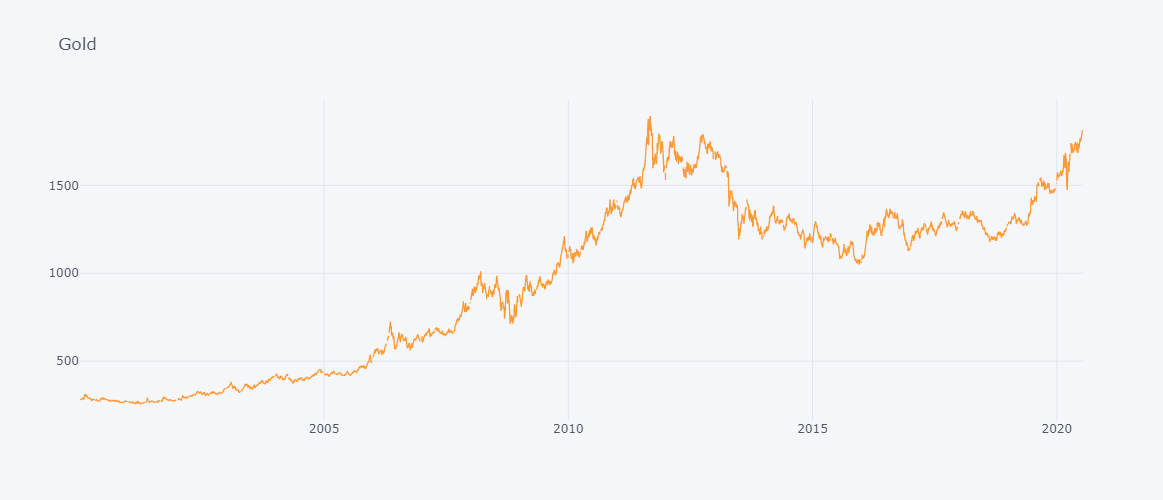

In [4]:
gold.iplot(dimensions=pa.dimensions, title='Gold')

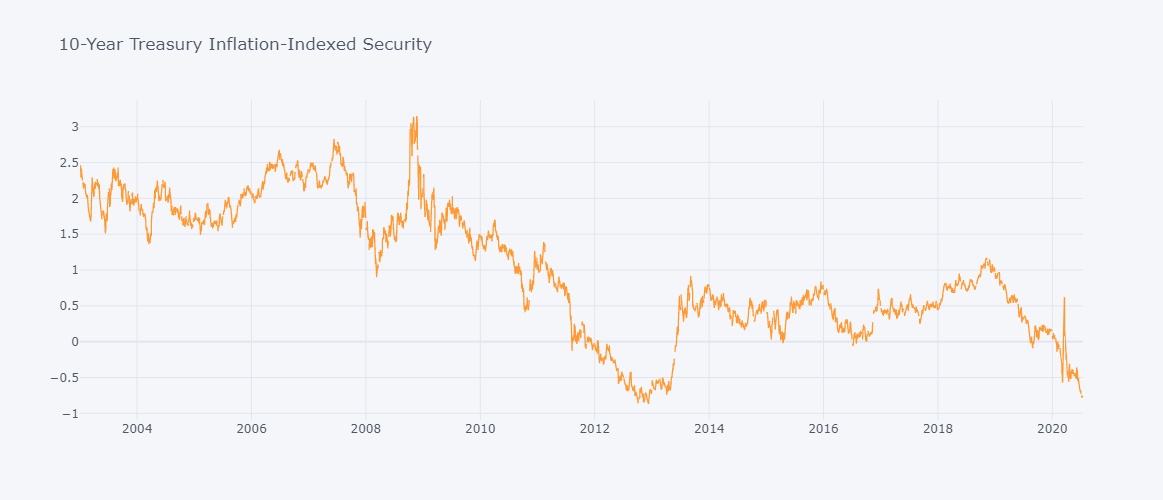

In [5]:
DFII10.iplot(dimensions=pa.dimensions, title='10-Year Treasury Inflation-Indexed Security')

In [6]:
data = pa.merge_time_series(DFII10, gold, how='inner').ffill()
pa.print_title('Data')
data

**Data**

,DFII10,GOLD
DATE,,
2003-01-02,2.43,343.80
2003-01-03,2.43,344.50
2003-01-06,2.46,351.75
2003-01-07,2.42,349.00
2003-01-08,2.29,349.75
...,...,...
2020-07-09,-0.77,"1,812.10"
2020-07-10,-0.76,"1,803.10"
2020-07-13,-0.78,"1,807.50"


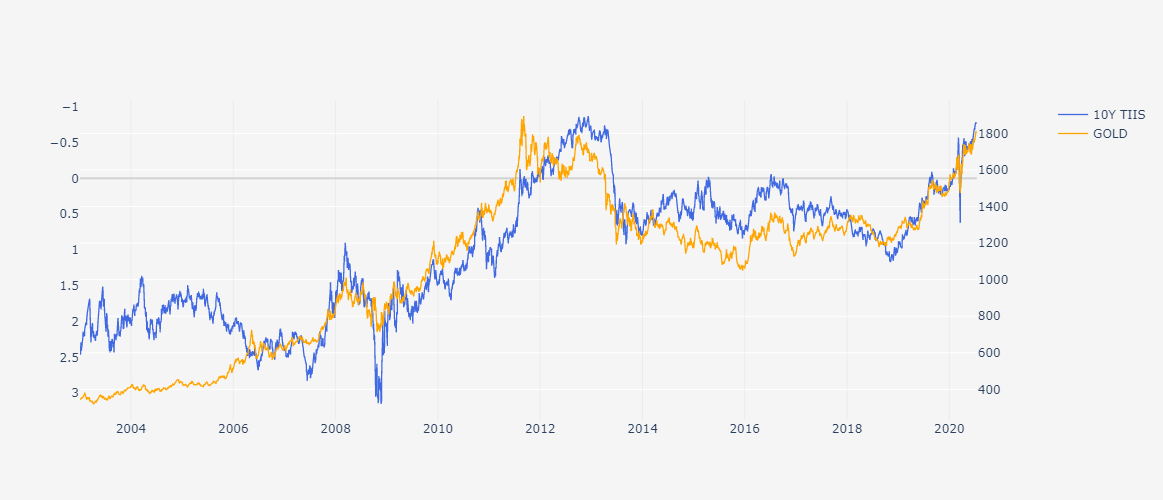

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data.index, y=data['DFII10'], name="10Y TIIS", line=dict(color = 'royalblue', width = 1.3)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data.index, y=data['GOLD'], name="GOLD", line=dict(color = 'orange', width = 1.3)),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="",
    width=990,
    height=500,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),    
    yaxis=dict(
        title='',
        showgrid=False,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',
        autorange='reversed'

    )
)

# Set y-axes titles
fig.update_yaxes(title_text="", secondary_y=False)
fig.update_yaxes(title_text="", secondary_y=True)

fig.show()

In [8]:
data.to_csv('10y_TIIS_vs_GOLD.csv')

In [9]:
returns = data.pct_change().dropna()#.resample('W').last()

import numpy as np
returns = returns[~returns.isin([np.nan, np.inf, -np.inf]).any(1)]

pa.print_title('Returns in percentage')
returns * 100

INFO: NumExpr defaulting to 4 threads.

**Returns in percentage**

,DFII10,GOLD
DATE,,
2003-01-03,0.00,0.20
2003-01-06,1.23,2.10
2003-01-07,-1.63,-0.78
2003-01-08,-5.37,0.21
2003-01-09,5.24,0.76
...,...,...
2020-07-09,2.67,0.06
2020-07-10,-1.30,-0.50
2020-07-13,2.63,0.24


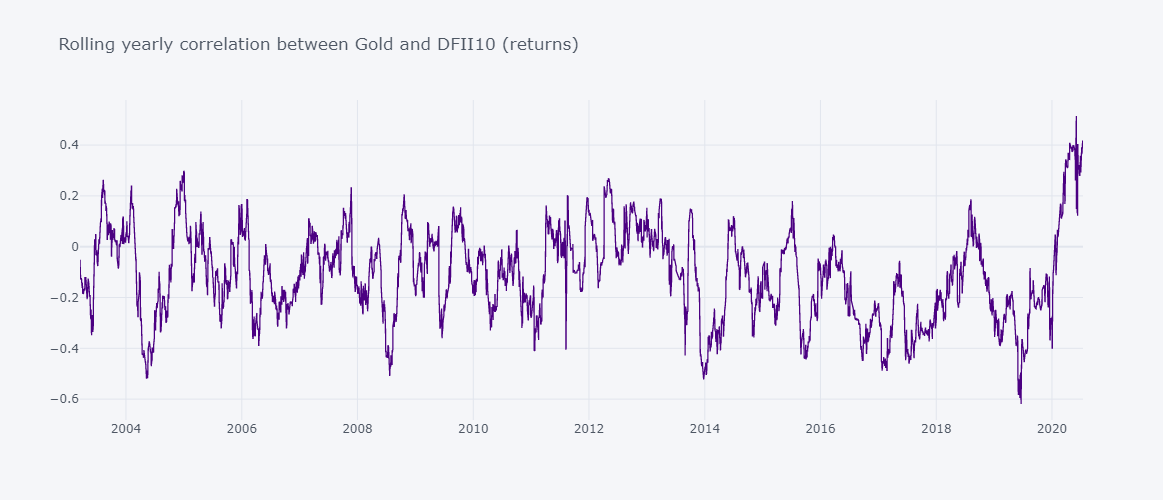

In [10]:
returns['GOLD'].rolling(52).corr(returns['DFII10']).dropna().iplot(dimensions=pa.dimensions, color='indigo', title='Rolling yearly correlation between Gold and DFII10 (returns)')

In [11]:
returns['GOLD'].rolling(52).corr(returns['DFII10']).dropna().to_csv('GOLD_DFII10_correlation.csv')

In [12]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF

In [30]:
start = datetime.datetime(2000, 1, 1)
M2V = web.DataReader('M2V', 'fred', start)
WALCL = web.DataReader('WALCL', 'fred', start)

data = pa.merge_time_series(M2V, WALCL, how='outer').ffill()

In [35]:
data = data.resample('Q').last()

In [ ]:
data.to_csv('MV2_vs_WALCL.csv')

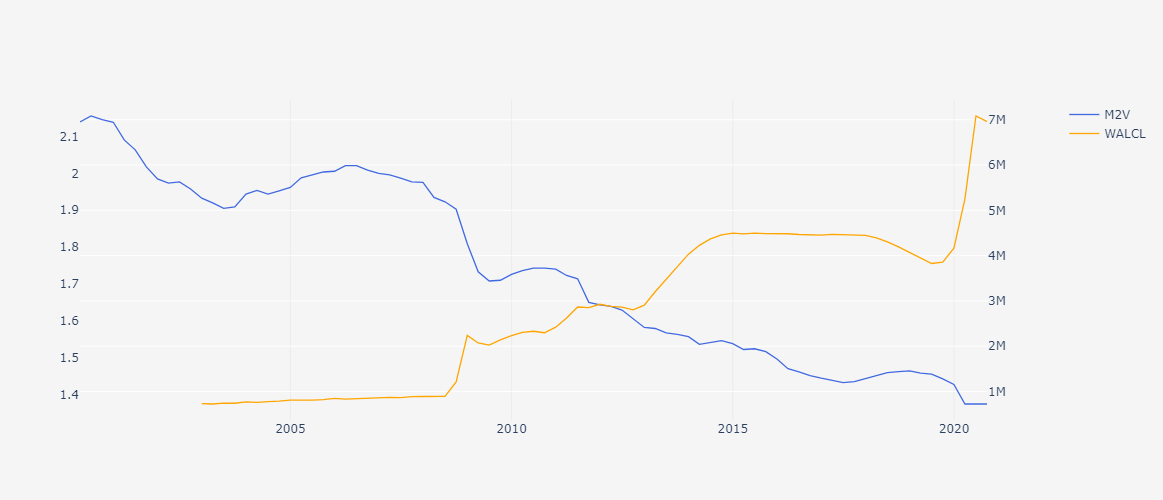

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data.index, y=data['M2V'], name="M2V", line=dict(color = 'royalblue', width = 1.3)),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=data.index, y=data['WALCL'], name="WALCL", line=dict(color = 'orange', width = 1.3)),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="",
    width=990,
    height=500,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),    
    yaxis=dict(
        title='',
        showgrid=False,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',

    )
)

# Set y-axes titles
fig.update_yaxes(title_text="", secondary_y=False)
fig.update_yaxes(title_text="", secondary_y=True)

fig.show()